In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df=pd.read_csv("/content/drive/MyDrive/Credit card/application_record.csv")

In [15]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [16]:
df.shape

(438557, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [18]:
df['ID'].duplicated().sum()

47

In [19]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [20]:
df.shape

(438510, 18)

In [21]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [22]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [23]:
# OHE - CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE

In [24]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [25]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [26]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [27]:
df.describe(percentiles=[.01,.05,.1,.25,.5,.75,.9,.95,.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,5.00,20.0


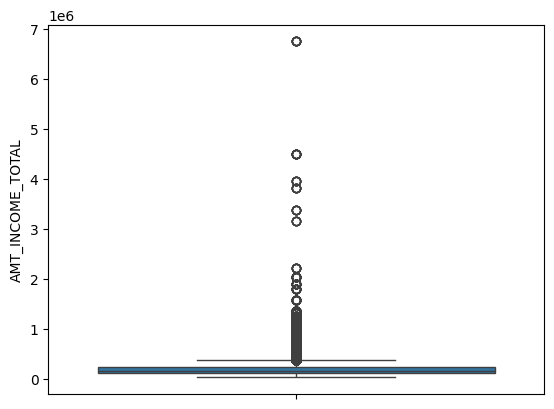

In [28]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

plt.show()

<Axes: ylabel='CNT_CHILDREN'>

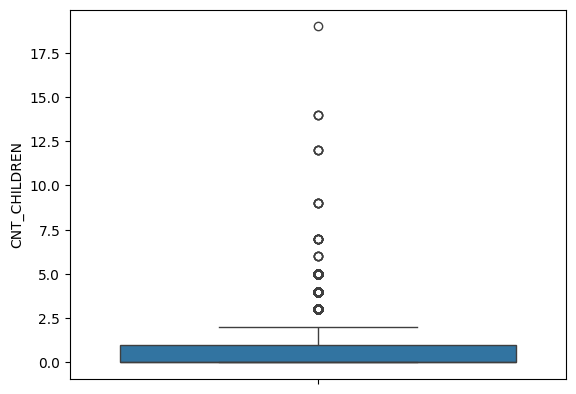

In [29]:
sns.boxplot(data=df, y=df['CNT_CHILDREN'])

In [30]:
df['DAYS_EMPLOYED'].max()

365243

<Axes: ylabel='DAYS_BIRTH'>

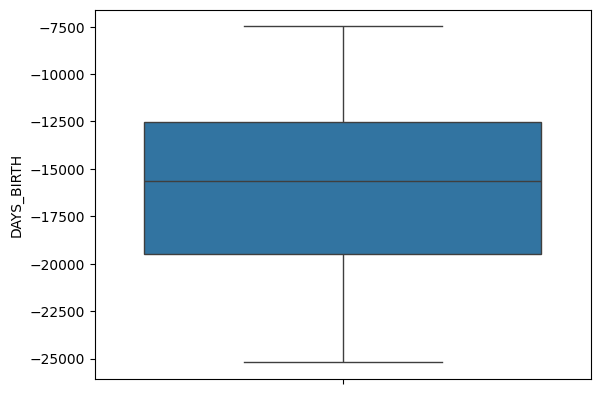

In [31]:
sns.boxplot(data=df, y=df['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

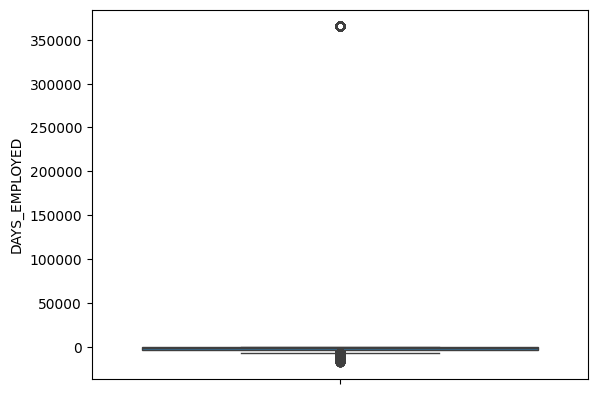

In [32]:
sns.boxplot(data=df, y=df['DAYS_EMPLOYED'])

In [33]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    75324
Name: count, dtype: int64

In [34]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [35]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
0    75324
Name: count, dtype: int64

In [36]:
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365.2425,0)


In [37]:
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [38]:
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [39]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.0,0.00,0.00,1.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.0,2.00,2.00,3.00,3.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,27.00,29.0,34.00,43.00,53.00,60.0,63.00,66.00,69.0
YEARS_EMPLOYED,438510.0,5.956069e+00,6.574244,0.0,0.00,0.0,1.00,4.00,8.00,14.0,20.00,30.00,48.0


In [40]:
df['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

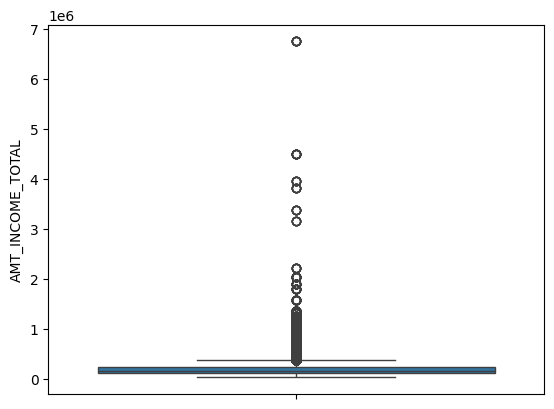

In [41]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

In [42]:
df[df['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [43]:
# OHE - CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE

In [44]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)


In [45]:
columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [46]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [47]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [48]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-0.589595,-0.477117,-1.331336,1.586974,-0.905971,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
438553,6840222,-0.589595,-0.763249,-1.331336,0.017048,0.310900,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,-0.589595,-1.212884,-1.331336,-1.901750,-0.753862,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,-0.589595,-1.049381,-0.216747,1.325320,-0.905971,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df1 = pd.read_csv("/content/drive/MyDrive/Credit card/credit_record.csv")

In [50]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [51]:
df1.shape

(1048575, 3)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [53]:
df1.duplicated().sum()

0

In [54]:
df1['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [55]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [56]:
df1[df1['STATUS'].isin(['X', 'C'])]


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [57]:
df1['ID'].nunique()

45985

In [58]:
df1['target']=df1['STATUS']
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)
df1['target']=df1['target'].astype(int)
df1.loc[df1['target']>=1,'target']=1

In [59]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()

In [60]:
df2.sample(10)

,ID,target
12045,5028602,0
14340,5037207,0
26660,5086014,0
17913,5050893,0
44885,5148887,0
24993,5068841,0
35727,5116369,0
40957,5132669,1
23670,5067180,0
30491,5095399,0


In [61]:
df2["target"].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [62]:
new_df=pd.merge(df, df2, how='inner', on=['ID'])

In [63]:
new_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-0.216747,0.278703,0.158791,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
36453,5149834,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
36454,5149838,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
36455,5150049,-0.589595,0.871790,-0.216747,0.453139,-0.601753,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [64]:
# Extract how many months account has been open for
start_df=pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [65]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [66]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [67]:
new_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target,ACCOUNT_LENGTH
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,1,1,15
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,1,1,14
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,1,0,0,0,29
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,1,0,0,0,0,0,4
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-0.216747,0.278703,0.158791,0,1,0,1,...,0,0,0,0,0,0,0,0,1,11
36453,5149834,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,1,0,0,0,0,0,0,0,1,23
36454,5149838,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,1,0,0,0,0,0,0,0,1,32
36455,5150049,-0.589595,0.871790,-0.216747,0.453139,-0.601753,1,0,1,0,...,0,0,0,1,0,0,0,0,1,9


In [68]:
new_df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUS

In [69]:
new_df.drop(columns=["ID"],inplace=True)

In [70]:
x = new_df.drop(columns=['target'])
y = new_df['target']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,stratify=y,random_state=0)

## Logistic Regression

In [72]:
lr = LogisticRegression(random_state=0)

In [73]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [74]:
lr.score(x_train,y_train)

0.8823056104162095

In [75]:
lr.score(x_test,y_test)

0.8822819528250138

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
y_pred1 = lr.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [80]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
dt.score(x_train,y_train),dt.score(x_test,y_test)

(0.9896130495208836, 0.8366428963247394)

In [82]:
params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}


In [83]:
from sklearn.model_selection import RandomizedSearchCV
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 11],
                                        'min_samples_leaf': [5, 10, 15, 20, 50,
                                                             80, 100],
                                        'min_samples_split': [10, 15, 20, 50,
                                                              100, 200, 250]})

In [84]:
rs_dt.score(x_train,y_train),rs_dt.score(x_test,y_test)


(0.8823056104162095, 0.8822819528250138)

In [85]:
y_pred = rs_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
y_pred1 = rs_dt.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [88]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [89]:
rf.score(x_train,y_train),rf.score(x_test,y_test)


(0.9895764757515909, 0.8769061985737795)

In [90]:
parameters={"criterion":['gini', 'entropy'],
           "max_depth":[5,7,9,11,13],
           "min_samples_split":[2,5,8,10,15,20],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[50,100,150,200,300],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

In [91]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0),param_distributions=parameters,cv=10,n_jobs=2)
rs_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.6, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]})

In [92]:
rs_rf.score(x_train,y_train),rs_rf.score(x_test,y_test)


(0.8823056104162095, 0.8822819528250138)

In [93]:
y_pred = rs_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
y_pred1 = rs_rf.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
pd.DataFrame(rf.feature_importances_,rf.feature_names_in_)

,0
CNT_CHILDREN,0.020363
AMT_INCOME_TOTAL,0.115337
CNT_FAM_MEMBERS,0.026951
AGE_YEARS,0.116508
YEARS_EMPLOYED,0.079752
CODE_GENDER_F,0.008411
CODE_GENDER_M,0.008283
FLAG_OWN_CAR_N,0.011415
FLAG_OWN_CAR_Y,0.011200
NAME_EDUCATION_TYPE_Academic degree,0.000578
